# Descarga librerias

In [ ]:
!pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('clusters_k3_assignments.csv')

In [ ]:
df.columns

Index(['Startup Name', 'Industry', 'Region', 'Exit Status',
       'Funding Amount (M USD)_log', 'Revenue (M USD)_log',
       'Valuation (M USD)_log', 'Employees_log', 'Market Share (%)', 'age',
       'funding_to_revenue', 'employees_to_revenue', 'valuation_to_age',
       'valuation_to_market_share', 'cluster_k3'],
      dtype='object')

In [ ]:
df.head()

,Startup Name,Industry,Region,Exit Status,Funding Amount (M USD)_log,Revenue (M USD)_log,Valuation (M USD)_log,Employees_log,Market Share (%),age,funding_to_revenue,employees_to_revenue,valuation_to_age,valuation_to_market_share,cluster_k3
0,Startup_1,IoT,Europe,Private,4.625855,4.232221,6.740224,7.292337,5.20,19,1.489465,21.629586,44.460526,162.451923,0
1,Startup_2,EdTech,South America,Private,5.515926,4.339250,8.105256,8.095904,8.10,22,3.273232,43.357568,150.492273,408.744444,0
2,Startup_3,EdTech,South America,Private,4.702660,4.445119,6.966373,8.503905,2.61,30,1.297233,58.579741,35.312333,405.888889,0
3,Startup_4,Gaming,South America,Private,2.463853,3.872866,4.633758,6.966024,2.53,22,0.228335,22.493628,4.631818,40.276680,1
4,Startup_5,IoT,Europe,Acquired,5.522580,3.936716,6.746541,7.552762,4.09,28,4.960796,37.910448,30.361071,207.850856,0


In [ ]:
od.download("https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Alejandra Aguilera
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends


100%|██████████| 11.6k/11.6k [00:00<00:00, 48.6MB/s]

# Info del dataset + clustering final

In [ ]:
df_org = pd.read_csv('./startup-growth-and-funding-trends/startup_data.csv')


print(df_org.head())
print(df_org.shape)

  Startup Name Industry  Funding Rounds  Funding Amount (M USD)  \
0    Startup_1      IoT               1                  101.09   
1    Startup_2   EdTech               1                  247.62   
2    Startup_3   EdTech               1                  109.24   
3    Startup_4   Gaming               5                   10.75   
4    Startup_5      IoT               4                  249.28   

   Valuation (M USD)  Revenue (M USD)  Employees  Market Share (%)  \
0             844.75            67.87       1468              5.20   
1            3310.83            75.65       3280              8.10   
2            1059.37            84.21       4933              2.61   
3             101.90            47.08       1059              2.53   
4             850.11            50.25       1905              4.09   

   Profitable  Year Founded         Region Exit Status  
0           0          2006         Europe     Private  
1           1          2003  South America     Private  
2    

In [ ]:
df_org.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Funding Amount (M USD)',
       'Valuation (M USD)', 'Revenue (M USD)', 'Employees', 'Market Share (%)',
       'Profitable', 'Year Founded', 'Region', 'Exit Status'],
      dtype='object')

In [ ]:
# Merge para traer Profitable al dataset de clusters
df_1 = df.merge(
    df_org[['Startup Name', 'Profitable']],
    on='Startup Name',
    how='left'
)

# Revisar que la columna quedó bien
print(df_1[['Startup Name', 'Profitable']].head())
print(df_1['Profitable'].value_counts(dropna=False))

  Startup Name  Profitable
0    Startup_1           0
1    Startup_2           1
2    Startup_3           1
3    Startup_4           0
4    Startup_5           0
Profitable
0    284
1    216
Name: count, dtype: int64


In [ ]:
df_1.head()

,Startup Name,Industry,Region,Exit Status,Funding Amount (M USD)_log,Revenue (M USD)_log,Valuation (M USD)_log,Employees_log,Market Share (%),age,funding_to_revenue,employees_to_revenue,valuation_to_age,valuation_to_market_share,cluster_k3,Profitable
0,Startup_1,IoT,Europe,Private,4.625855,4.232221,6.740224,7.292337,5.20,19,1.489465,21.629586,44.460526,162.451923,0,0
1,Startup_2,EdTech,South America,Private,5.515926,4.339250,8.105256,8.095904,8.10,22,3.273232,43.357568,150.492273,408.744444,0,1
2,Startup_3,EdTech,South America,Private,4.702660,4.445119,6.966373,8.503905,2.61,30,1.297233,58.579741,35.312333,405.888889,0,1
3,Startup_4,Gaming,South America,Private,2.463853,3.872866,4.633758,6.966024,2.53,22,0.228335,22.493628,4.631818,40.276680,1,0
4,Startup_5,IoT,Europe,Acquired,5.522580,3.936716,6.746541,7.552762,4.09,28,4.960796,37.910448,30.361071,207.850856,0,0


## Regresion lineal

In [ ]:

# Definir features (numéricas + cluster como dummy)
features = [
    'Funding Amount (M USD)_log', 'Revenue (M USD)_log', 'Valuation (M USD)_log',
    'Employees_log', 'Market Share (%)', 'age',
    'funding_to_revenue', 'employees_to_revenue',
    'valuation_to_age', 'valuation_to_market_share',
    'cluster_k3'
]

X = df_1[features]
y = df_1['Profitable']

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
# Modelo lineal
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Predicciones
y_pred = linreg.predict(X_test)

# Métricas regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)
print("Ejemplo predicciones:", y_pred[:10])


MSE: 0.24184919533970184
R^2: 0.015093774634698298
Ejemplo predicciones: [0.30488199 0.5045074  0.4426839  0.4727019  0.4127366  0.53096428
 0.41503063 0.45376245 0.43832949 0.36208981]


In [ ]:
# Clasificación usando 0.5 como umbral
y_pred_class = (y_pred >= 0.5).astype(int)

print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))

[[70 15]
 [47 18]]
              precision    recall  f1-score   support

           0       0.60      0.82      0.69        85
           1       0.55      0.28      0.37        65

    accuracy                           0.59       150
   macro avg       0.57      0.55      0.53       150
weighted avg       0.58      0.59      0.55       150



## Regresión logistica

In [ ]:
# Modelo logístico
logreg = LogisticRegression(max_iter=1000, solver="liblinear")
logreg.fit(X_train, y_train)

# Predicciones
y_pred_log = logreg.predict(X_test)
y_prob_log = logreg.predict_proba(X_test)[:,1]

# Reporte
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob_log)
print("ROC-AUC:", roc_auc)

[[68 17]
 [47 18]]
              precision    recall  f1-score   support

           0       0.59      0.80      0.68        85
           1       0.51      0.28      0.36        65

    accuracy                           0.57       150
   macro avg       0.55      0.54      0.52       150
weighted avg       0.56      0.57      0.54       150

ROC-AUC: 0.5473303167420814


In [ ]:
def evaluate_threshold(threshold=0.5):
    y_pred_thr = (y_prob_log >= threshold).astype(int)
    print(f"\n--- Umbral {threshold} ---")
    print(confusion_matrix(y_test, y_pred_thr))
    print(classification_report(y_test, y_pred_thr))

# Prueba con varios umbrales
for t in [0.5, 0.4, 0.3]:
    evaluate_threshold(t)



--- Umbral 0.5 ---
[[68 17]
 [47 18]]
              precision    recall  f1-score   support

           0       0.59      0.80      0.68        85
           1       0.51      0.28      0.36        65

    accuracy                           0.57       150
   macro avg       0.55      0.54      0.52       150
weighted avg       0.56      0.57      0.54       150


--- Umbral 0.4 ---
[[35 50]
 [20 45]]
              precision    recall  f1-score   support

           0       0.64      0.41      0.50        85
           1       0.47      0.69      0.56        65

    accuracy                           0.53       150
   macro avg       0.56      0.55      0.53       150
weighted avg       0.57      0.53      0.53       150


--- Umbral 0.3 ---
[[ 3 82]
 [ 3 62]]
              precision    recall  f1-score   support

           0       0.50      0.04      0.07        85
           1       0.43      0.95      0.59        65

    accuracy                           0.43       150
   macro av

In [ ]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coef": logreg.coef_[0]
}).sort_values(by="Coef", key=abs, ascending=False)

print(coef_df)


                       Feature      Coef
0   Funding Amount (M USD)_log -0.097045
4             Market Share (%)  0.095564
2        Valuation (M USD)_log  0.062934
3                Employees_log -0.045325
1          Revenue (M USD)_log  0.044874
10                  cluster_k3  0.018328
6           funding_to_revenue -0.007161
5                          age -0.005691
8             valuation_to_age  0.000683
9    valuation_to_market_share  0.000116
7         employees_to_revenue  0.000022


## Arbol decisión

In [ ]:


# Árbol de decisión
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

print("\n=== Árbol de Decisión ===")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_dt))

# Random Forest
rf = RandomForestClassifier(n_estimators=200, max_depth=7, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:,1]

print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))



=== Árbol de Decisión ===
              precision    recall  f1-score   support

           0       0.55      0.74      0.63        85
           1       0.39      0.22      0.28        65

    accuracy                           0.51       150
   macro avg       0.47      0.48      0.46       150
weighted avg       0.48      0.51      0.48       150

ROC-AUC: 0.45864253393665155

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.58      0.75      0.66        85
           1       0.47      0.29      0.36        65

    accuracy                           0.55       150
   macro avg       0.53      0.52      0.51       150
weighted avg       0.54      0.55      0.53       150

ROC-AUC: 0.5840723981900453


In [ ]:
df_1.columns

Index(['Startup Name', 'Industry', 'Region', 'Exit Status',
       'Funding Amount (M USD)_log', 'Revenue (M USD)_log',
       'Valuation (M USD)_log', 'Employees_log', 'Market Share (%)', 'age',
       'funding_to_revenue', 'employees_to_revenue', 'valuation_to_age',
       'valuation_to_market_share', 'cluster_k3', 'Profitable'],
      dtype='object')

In [ ]:
import datetime

# Año actual
current_year = datetime.datetime.now().year

# Crear variable age
df_org['age'] = current_year - df_org['Year Founded']

# Revisar
print(df_org[['Startup Name','Year Founded','age']].head())

  Startup Name  Year Founded  age
0    Startup_1          2006   19
1    Startup_2          2003   22
2    Startup_3          1995   30
3    Startup_4          2003   22
4    Startup_5          1997   28


In [ ]:
raw_features = [
    'Funding Amount (M USD)', 'Revenue (M USD)', 'Valuation (M USD)',
    'Employees', 'Market Share (%)', 'age',
    'Industry', 'Region', 'Exit Status'
]

X_raw = df_org[raw_features]
y_raw = df_org['Profitable']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.3, random_state=42, stratify=y_raw
)

# Preprocesamiento: numéricas y categóricas
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

num_cols = ['Funding Amount (M USD)', 'Revenue (M USD)', 'Valuation (M USD)',
            'Employees', 'Market Share (%)', 'age']
cat_cols = ['Industry', 'Region', 'Exit Status']

preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

log_reg_raw = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, solver="liblinear"))
])

# Entrenar
log_reg_raw.fit(X_train, y_train)
y_pred = log_reg_raw.predict(X_test)
y_prob = log_reg_raw.predict_proba(X_test)[:,1]

# Evaluación
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


[[60 25]
 [41 24]]
              precision    recall  f1-score   support

           0       0.59      0.71      0.65        85
           1       0.49      0.37      0.42        65

    accuracy                           0.56       150
   macro avg       0.54      0.54      0.53       150
weighted avg       0.55      0.56      0.55       150

ROC-AUC: 0.5476923076923077


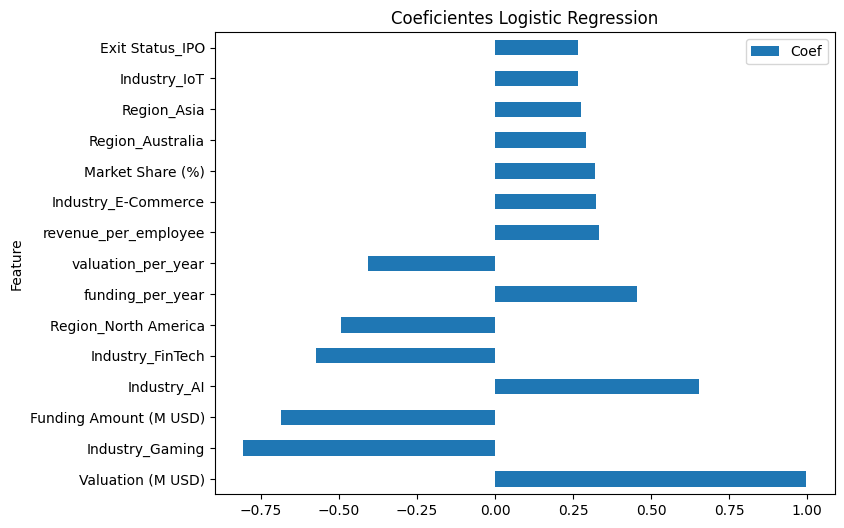

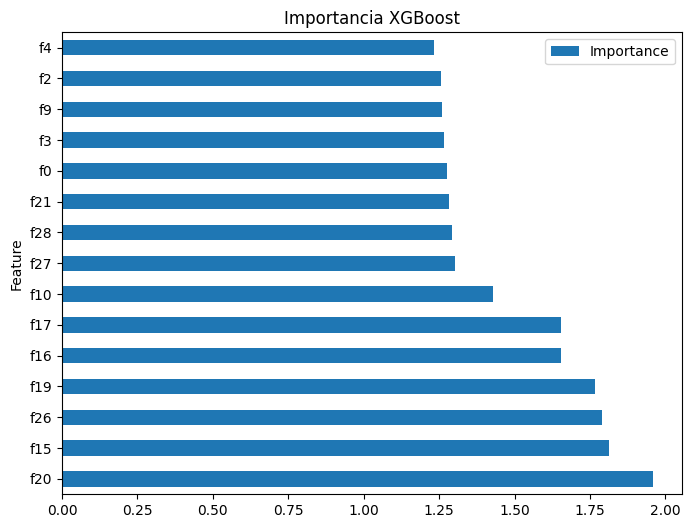

In [ ]:
import matplotlib.pyplot as plt

# Logistic
coef_df.head(15).plot(kind="barh", x="Feature", y="Coef", figsize=(8,6), title="Coeficientes Logistic Regression")
plt.show()

# XGBoost
feat_importances_xgb.head(15).plot(kind="barh", x="Feature", y="Importance", figsize=(8,6), title="Importancia XGBoost")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

# Modelo logístico con regularización L1 (Lasso)
log_reg_l1 = Pipeline([
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        penalty="l1",           # regularización L1
        solver="liblinear",     # solver compatible
        C=1.0,                  # fuerza de regularización (más bajo = más fuerte)
        max_iter=1000,
        random_state=42
    ))
])

# Entrenar
log_reg_l1.fit(X_train, y_train)

# Predicciones
y_pred_l1 = log_reg_l1.predict(X_test)
y_prob_l1 = log_reg_l1.predict_proba(X_test)[:,1]

# Evaluación
print("\n=== Logistic Regression con L1 ===")
print(confusion_matrix(y_test, y_pred_l1))
print(classification_report(y_test, y_pred_l1))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_l1))

# === Coeficientes ===
log_clf_l1 = log_reg_l1.named_steps['classifier']
log_features = (
    log_reg_l1.named_steps['preprocessor']
    .transformers_[0][2] +  # num cols
    list(
        log_reg_l1.named_steps['preprocessor']
        .transformers_[1][1]   # one-hot encoder
        .get_feature_names_out(cat_cols)
    )
)

coef_df_l1 = pd.DataFrame({
    "Feature": log_features,
    "Coef": log_clf_l1.coef_[0]
}).sort_values(by="Coef", key=np.abs, ascending=False)

print("\n=== Variables seleccionadas (coef ≠ 0) ===")
print(coef_df_l1[coef_df_l1["Coef"] != 0])



=== Logistic Regression con L1 ===
[[68 17]
 [41 24]]
              precision    recall  f1-score   support

           0       0.62      0.80      0.70        85
           1       0.59      0.37      0.45        65

    accuracy                           0.61       150
   macro avg       0.60      0.58      0.58       150
weighted avg       0.61      0.61      0.59       150

ROC-AUC: 0.5574660633484163

=== Variables seleccionadas (coef ≠ 0) ===
                     Feature      Coef
20           Industry_Gaming -0.923895
2          Valuation (M USD)  0.742345
19          Industry_FinTech -0.716899
0     Funding Amount (M USD) -0.494308
26      Region_North America -0.464385
15               Industry_AI  0.411475
4           Market Share (%)  0.302859
16    Industry_Cybersecurity -0.254644
9           funding_per_year  0.231722
6       revenue_per_employee  0.230836
29           Exit Status_IPO  0.215687
24          Region_Australia  0.202792
11      valuation_to_funding -0.182734
